# Introduction

In this tutorial, we will learn about Detection Error Tradeoff (DET) curves and compare them with Receiver Operating Characteristic (ROC) curves. DET curves are a variation of ROC curves, where False Negative Rate (FNR) is plotted on the y-axis instead of the True Positive Rate (TPR). We will use scikit-learn, a popular Python library for machine learning, to generate synthetic data and compare the statistical performance of two classifiers across thresholds using ROC and DET curves.

# Generate Synthetic Data

We will use scikit-learn's **make_classification** function to generate synthetic data. This function generates a random n-class classification problem, with n_informative informative features, n_redundant redundant features, and n_clusters_per_class clusters per class. We will generate 1000 samples with 2 informative features and a random state of 1. We will then split the data into training and test sets with a 60/40 ratio.

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1_000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Define the Classifiers

We will define two different classifiers to compare their statistical performance across thresholds using ROC and DET curves. We will use scikit-learn's **make_pipeline** function to create a pipeline that scales the data using **StandardScaler** and trains a **LinearSVC** classifier. We will also use scikit-learn's**RandomForestClassifier** class to train a random forest classifier with a maximum depth of 5, 10 estimators, and a maximum of 1 feature.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifiers = {
    'Linear SVM': make_pipeline(StandardScaler(), LinearSVC(C=0.025, dual='auto')),
    'Random Forest': RandomForestClassifier(random_state=0, max_depth=5, n_estimators=10, max_features=1),
}

# Plot ROC and DET Curves

We will use scikit-learn's **RocCurveDisplay** and **DetCurveDisplay** classes to plot the ROC and DET curves, respectively. The **RocCurveDisplay.from_estimator** function calculates the ROC curve and plots it on the given axis. Similarly, the **DetCurveDisplay.from_estimator** function calculates the DET curve and plots it on the given axis. We will create two subplots, one for ROC curves and one for DET curves, and plot the curves for each classifier.

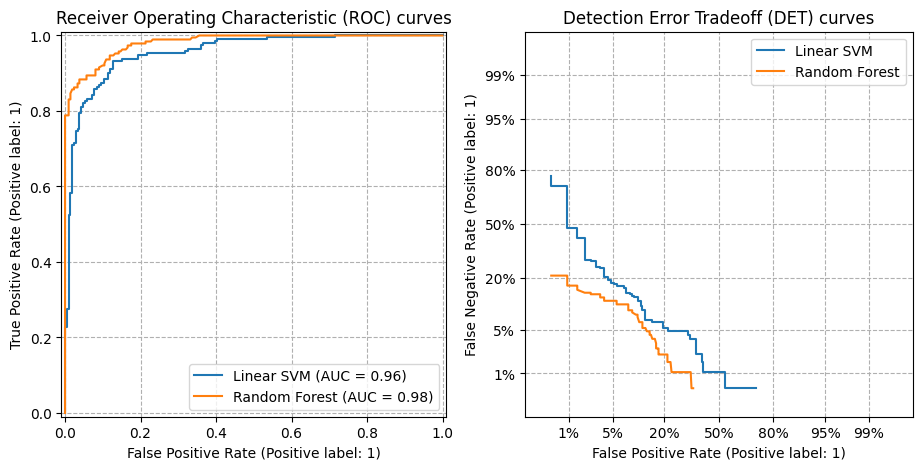

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fix, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

# Interpretation of Results

It is easier to visually assess the overall performance of different classification algorithms using DET curves than using ROC curves. DET curves give direct feedback of the detection error tradeoff to aid in operating point analysis. The user can then decide the FNR they are willing to accept at the expense of the FPR (or vice-versa).

# Summary

In this tutorial, we learned about Detection Error Tradeoff (DET) curves and compared them with Receiver Operating Characteristic (ROC) curves. We used scikit-learn to generate synthetic data and compare the statistical performance of two classifiers across thresholds using ROC and DET curves. DET curves are a variation of ROC curves, where False Negative Rate (FNR) is plotted on the y-axis instead of the True Positive Rate (TPR). DET curves give direct feedback of the detection error tradeoff to aid in operating point analysis, making them a useful tool for evaluating the performance of classification algorithms.